Praktikum 7 datamining
Naïve bayes classification

Nama : Frans Vito Jonathan Simamora

NIM : 202410101147

Kelas Data Mining A

Lakukan dan jelaskan klasifikasi naive bayes pada dataset adult.csv dengan ketentuan dan
langkah-langkah sebagai berikut:
Data preprocessing
1. Load dataset adult.csv dan buang feature yang tidak dibutuhkan serta rapikan dataset
2. Batasi dataset hanya pada data yang memiliki umur 25 - 40 tahun
3. Cek tipe data pada masing-masing feature dan encoding bila diperlukan
4. Cek data null dan data duplicated
5. Handling miss value dan handling duplicated data jika diperlukan
6. Cek data outlier dengan visualisasikan dalam boxplot pada masing-masing feature
7. Handling outlier jika diperlukan
8. Normalisasikan data menggunakan normalisasi minmax

Modelling

9. Lakukan modelling dengan data test size 20%, 25% dan 30% serta tampilkan hasil skor
akurasi

In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [38]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.replace('?', np.nan, inplace=True) #mengubah data ? menjadi data null
df.dropna(inplace=True) #menghapus semua data null
df.head()

In [41]:
df['age'].unique()

array([25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 48, 43, 20, 37, 45, 22,
       23, 54, 32, 46, 56, 17, 29, 39, 52, 18, 21, 42, 33, 30, 47, 41, 19,
       69, 50, 31, 59, 49, 58, 40, 27, 57, 61, 51, 73, 53, 80, 62, 35, 72,
       64, 68, 66, 60, 67, 71, 70, 90, 77, 81, 74, 78, 82, 75, 85, 76, 89,
       83, 79, 88, 87, 84, 86], dtype=int64)

In [42]:
age = df['age']
df = df[(age >= 25) & (age <= 40)]
df['age'].unique()

array([25, 38, 28, 34, 36, 26, 37, 32, 29, 39, 33, 30, 31, 40, 27, 35],
      dtype=int64)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 0 to 48838
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              19243 non-null  int64 
 1   workclass        19243 non-null  object
 2   fnlwgt           19243 non-null  int64 
 3   education        19243 non-null  object
 4   educational-num  19243 non-null  int64 
 5   marital-status   19243 non-null  object
 6   occupation       19243 non-null  object
 7   relationship     19243 non-null  object
 8   race             19243 non-null  object
 9   gender           19243 non-null  object
 10  capital-gain     19243 non-null  int64 
 11  capital-loss     19243 non-null  int64 
 12  hours-per-week   19243 non-null  int64 
 13  native-country   19243 non-null  object
 14  income           19243 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.3+ MB


In [44]:
objek = df.select_dtypes('object').columns
df[objek] = df[objek].apply(LabelEncoder().fit_transform)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0
11,36,0,212465,9,13,2,0,0,4,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48827,37,2,198216,7,12,0,12,1,4,0,0,0,40,38,0
48832,32,2,34066,0,6,2,5,0,0,1,0,0,40,38,0
48834,32,2,116138,12,14,4,12,1,1,1,0,0,11,35,0
48837,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 0 to 48838
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              19243 non-null  int64
 1   workclass        19243 non-null  int32
 2   fnlwgt           19243 non-null  int64
 3   education        19243 non-null  int32
 4   educational-num  19243 non-null  int64
 5   marital-status   19243 non-null  int32
 6   occupation       19243 non-null  int32
 7   relationship     19243 non-null  int32
 8   race             19243 non-null  int32
 9   gender           19243 non-null  int32
 10  capital-gain     19243 non-null  int64
 11  capital-loss     19243 non-null  int64
 12  hours-per-week   19243 non-null  int64
 13  native-country   19243 non-null  int32
 14  income           19243 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 1.7 MB


In [46]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [47]:
df.duplicated().sum()

16

In [48]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<AxesSubplot:>

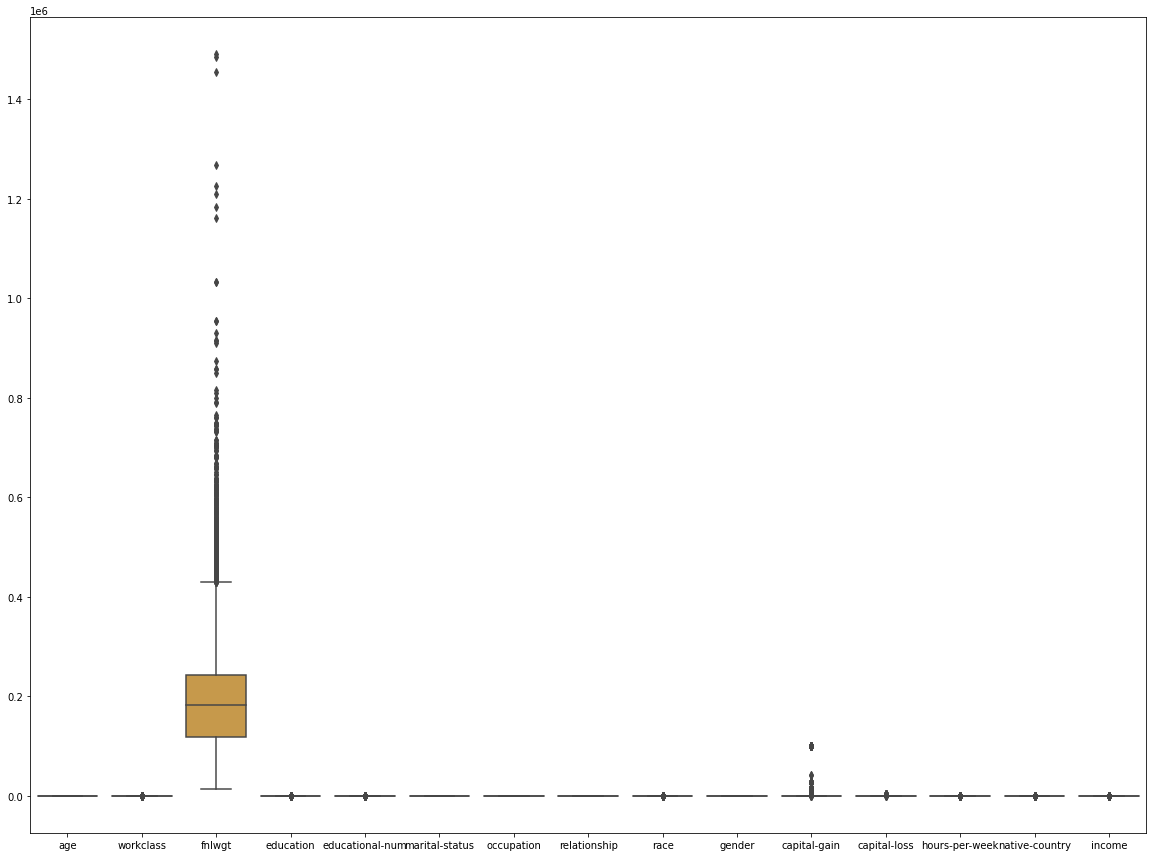

In [49]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

<AxesSubplot:>

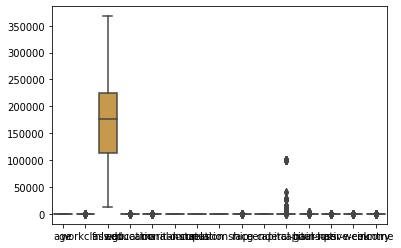

In [50]:
fnlwgt = df['fnlwgt']
Q1 = fnlwgt.quantile(0.25)
Q3 = fnlwgt.quantile(0.75)
hasil = Q3-Q1

df = df[(fnlwgt>Q1 - hasil)&(fnlwgt <Q3 + hasil)] 
sns.boxplot(data=df) 

In [51]:
nonObject = df.loc[:, ~df.columns.isin(objek)].columns.tolist()
df[nonObject] = MinMaxScaler().fit_transform(df[nonObject])
df

C:\Users\Frans Vito\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.000000,2,0.602501,1,0.400000,4,6,3,2,1,0.0,0.0,0.397959,38,0
1,0.866667,2,0.215574,11,0.533333,2,4,0,4,1,0.0,0.0,0.500000,38,0
2,0.200000,1,0.913620,7,0.733333,2,10,0,4,1,0.0,0.0,0.397959,38,1
5,0.600000,2,0.523106,0,0.333333,4,7,1,4,1,0.0,0.0,0.295918,38,0
11,0.733333,0,0.562006,9,0.800000,2,0,0,4,1,0.0,0.0,0.397959,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48827,0.800000,2,0.521759,7,0.733333,0,12,1,4,0,0.0,0.0,0.397959,38,0
48832,0.466667,2,0.058112,0,0.333333,2,5,0,0,1,0.0,0.0,0.397959,38,0
48834,0.466667,2,0.289927,12,0.866667,4,12,1,1,1,0.0,0.0,0.102041,35,0
48837,0.133333,2,0.688649,7,0.733333,2,12,5,4,0,0.0,0.0,0.377551,38,0


In [52]:
df.reset_index()

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,0.000000,2,0.602501,1,0.400000,4,6,3,2,1,0.0,0.0,0.397959,38,0
1,1,0.866667,2,0.215574,11,0.533333,2,4,0,4,1,0.0,0.0,0.500000,38,0
2,2,0.200000,1,0.913620,7,0.733333,2,10,0,4,1,0.0,0.0,0.397959,38,1
3,5,0.600000,2,0.523106,0,0.333333,4,7,1,4,1,0.0,0.0,0.295918,38,0
4,11,0.733333,0,0.562006,9,0.800000,2,0,0,4,1,0.0,0.0,0.397959,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17972,48827,0.800000,2,0.521759,7,0.733333,0,12,1,4,0,0.0,0.0,0.397959,38,0
17973,48832,0.466667,2,0.058112,0,0.333333,2,5,0,0,1,0.0,0.0,0.397959,38,0
17974,48834,0.466667,2,0.289927,12,0.866667,4,12,1,1,1,0.0,0.0,0.102041,35,0
17975,48837,0.133333,2,0.688649,7,0.733333,2,12,5,4,0,0.0,0.0,0.377551,38,0


In [23]:
x = df.iloc[:, :-1] # x atribute
y = df.iloc[:, -1]  # y class

In [53]:
model = GaussianNB()

def test(ukuran):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ukuran, random_state=100)
    model.fit(x_train, y_train)

    print('akurasi model dengan ukuran ', ukuran, 'adalah')
    print(model.score(x_test, y_test))
    print()

In [54]:
test(0.2)
test(0.25)
test(0.3)

akurasi model dengan ukuran  0.2 adalah
0.7838541666666666

akurasi model dengan ukuran  0.25 adalah
0.7828703703703703

akurasi model dengan ukuran  0.3 adalah
0.7849151234567902

